# Experiment 1: Image Dimensions

### Introdution:
The objective of this notebook is to find a common point in image dimensions. This is so that the resulting dimensions is not too large that it inflates the size of the augmented dataset while also not being too small that important features are not lost or shrunk too much.

We will try to find a length and width dimension that covers most of the images.

In [2]:
# Import section
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
DATA_PATH = os.path.join(os.getcwd(), '..', 'data', 'Dataset')
print(DATA_PATH)

/Users/sriharikarthickn/Developer/Projects/Uni/cv-mini-project/src/experiments/../data/Dataset


In [19]:
heights = []
widths = []

train_path = os.path.join(DATA_PATH, 'TrainVal', 'color')
test_path = os.path.join(DATA_PATH, 'Test', 'color')

train_files = [os.path.join(train_path, i) for i in os.listdir(train_path)]
test_files = [os.path.join(test_path, i) for i in os.listdir(test_path)]
all_files = train_files + test_files

for file_name in all_files:
    if file_name.endswith(('jpg', 'jpeg', 'png')):
        image = Image.open(file_name)
        heights.append(image.height)
        widths.append(image.width)

# Convert to numpy arrays
heights = np.array(heights)
widths = np.array(widths)

# Get the distribution
min_size = (np.min(heights), np.min(widths))
max_size = (np.max(heights), np.max(widths))
mean_size = (np.mean(heights), np.mean(widths))
median_size = (np.median(heights), np.median(widths))
percentile_75 = (np.percentile(heights, 75), np.percentile(widths, 75))
percentile_90 = (np.percentile(heights, 90), np.percentile(widths, 90))
percentile_95 = (np.percentile(heights, 95), np.percentile(widths, 95))
percentile_99 = (np.percentile(heights, 99), np.percentile(widths, 99))

In [11]:
print(min_size)
print(max_size)
print(mean_size)
print(median_size)
print(percentile_75)
print(percentile_90)
print(percentile_95)
print(percentile_99)

(np.int64(103), np.int64(114))
(np.int64(2606), np.int64(3264))
(np.float64(390.9136671177267), np.float64(436.7451962110961))
(np.float64(375.0), np.float64(500.0))
(np.float64(500.0), np.float64(500.0))
(np.float64(500.0), np.float64(500.0))
(np.float64(500.0), np.float64(500.0))
(np.float64(550.989999999997), np.float64(600.0))


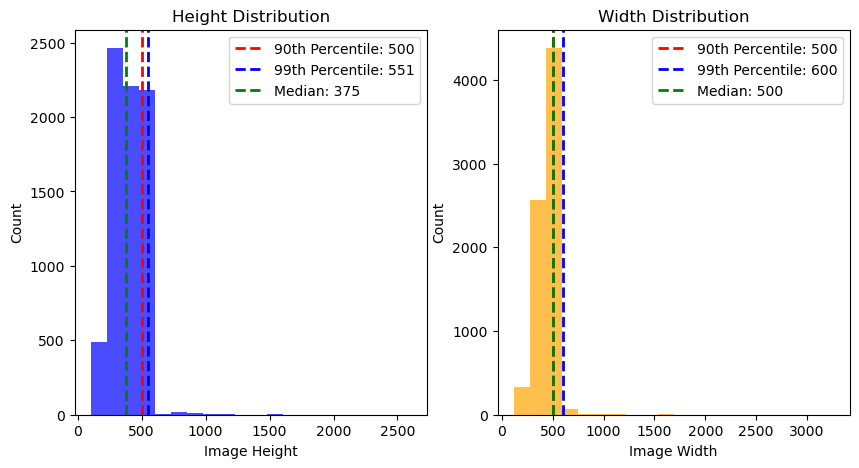

In [20]:
# Plot distribution of heights
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.axvline(percentile_90[0], color='r', linestyle='dashed',
            linewidth=2, label=f"90th Percentile: {percentile_90[0]:.0f}")
plt.axvline(percentile_99[0], color='b', linestyle='dashed',
            linewidth=2, label=f"99th Percentile: {percentile_99[0]:.0f}")
plt.axvline(median_size[0], color='g', linestyle='dashed',
            linewidth=2, label=f"Median: {median_size[0]:.0f}")
plt.xlabel("Image Height")
plt.ylabel("Count")
plt.title("Height Distribution")
plt.legend()

# Plot distribution of widths
plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='orange', alpha=0.7)
plt.axvline(percentile_90[1], color='r', linestyle='dashed',
            linewidth=2, label=f"90th Percentile: {percentile_90[1]:.0f}")
plt.axvline(percentile_99[1], color='b', linestyle='dashed',
            linewidth=2, label=f"99th Percentile: {percentile_99[1]:.0f}")
plt.axvline(median_size[1], color='g', linestyle='dashed',
            linewidth=2, label=f"Median: {median_size[1]:.0f}")
plt.xlabel("Image Width")
plt.ylabel("Count")
plt.title("Width Distribution")
plt.legend()
plt.show()

### Conclusion:
Common dimensions of H: 560  and W: 600 covers 99% of the images. We can do this to retain majority of the data and not lose any significant performance.

### PS
Find the file names of the images that are larger than the 99%ile, for our confirmation post processing.

In [27]:
outlier_files = []
for file_name in all_files:
    if file_name.endswith(('jpg', 'jpeg', 'png')):
        image = Image.open(file_name)
        if image.height > 560 or image.width > 600:
            outlier_files.append((file_name, image.height, image.width))

In [28]:
print(len(outlier_files))

97


In [29]:
print(outlier_files[70])

('/Users/sriharikarthickn/Developer/Projects/Uni/cv-mini-project/src/experiments/../data/Dataset/Test/color/Sphynx_231.jpg', 430, 625)
